Python Machine Learning Mini-Course

https://machinelearningmastery.com/python-machine-learning-mini-course/

# Import Libraries

In [2]:
# Load libraries
import sys
import scipy
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load dataset

Load the Pima Indians onset of diabetes dataset using Pandas directly from the UCI Machine Learning Repository

In [3]:
# Load CSV using Pandas from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Exploratory Data Analysis (EDA)

## Understand data with descriptive statistics

In [4]:
# dimension (rows, columns)
data.shape

(768, 9)

In [5]:
# head (first 10 rows)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# descriptive stats
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# data types
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [14]:
# distribution of an attribute (e.g. "class")
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In [11]:
# pairwise correlation between attributes
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
# missing values
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

## Understand data with visualization

### Univariate plots to understand each individual attribute

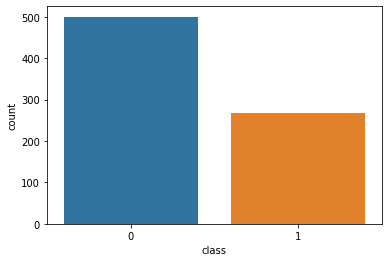

In [13]:
# Dependent variable -- 'class'
sns.countplot(data['class'])

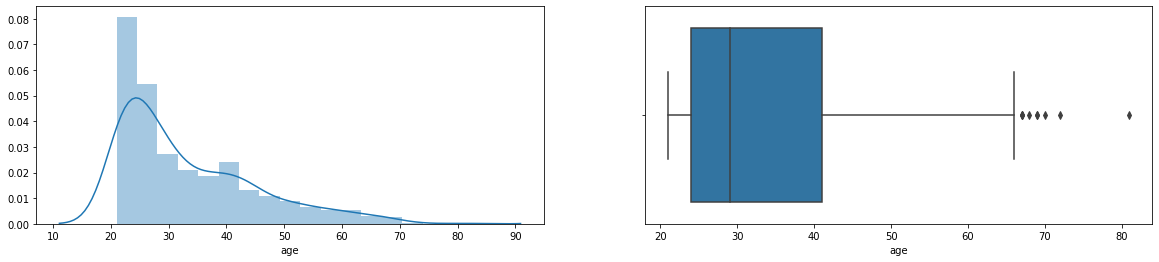

In [14]:
# Distribution of attribute -- "age"
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(data['age'])
f.add_subplot(1,2,2)
sns.boxplot(data['age'])

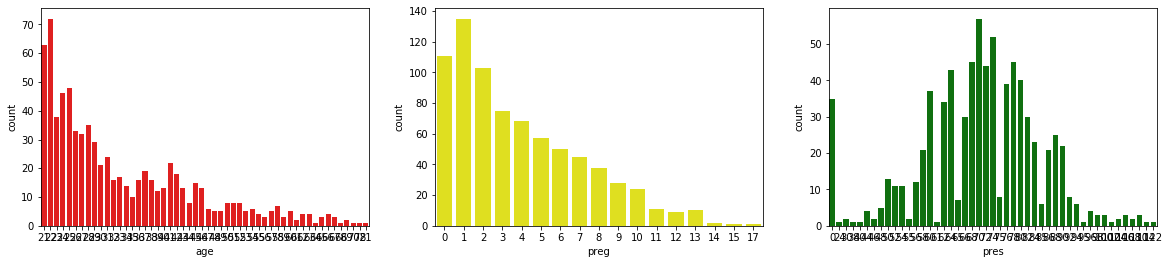

In [17]:
# distribution of 2 attributes to compare their shapes
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
sns.countplot(data['age'], color='red')
f.add_subplot(1,3,2)
sns.countplot(data['preg'], color='yellow')
f.add_subplot(1,3,3)
sns.countplot(data['pres'], color='green')

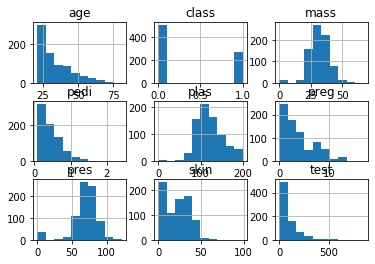

In [9]:
# histograms
data.hist()
plt.show()

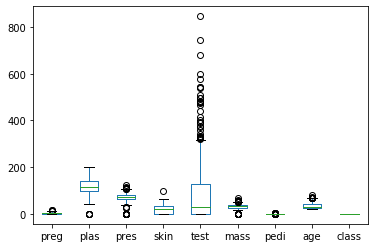

In [10]:
# box and whisker plots
data.plot(kind = 'box')
plt.show()

### Multivariate plots to understand relationship between attributes

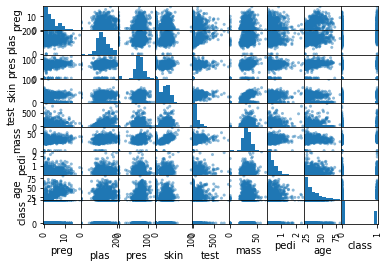

In [12]:
# scatter plot matrix
scatter_matrix(data)
plt.show()

# Preprocess Data

In [133]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

# Show head of transformed data
(pd.DataFrame(rescaledX)).head(5)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


---

# Modeling

**5 Levels of ML Model Iteration:**
1. Fitting Parameters
2. Tuning Hyperparameters
3. Feature Engineering

---

**Model Types**

**- Linear models:**
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)

**- Nonlinear models:**
* K-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)
* Ridge Regression (RR)

**- Bagging ensemble models:**
* Random Forest (RF)

---

Split dataset into train/test set:

In [63]:
# Create x (independent, input) + y (dependent, output) variables
x = data.drop(columns=['class'])
y = data['class']

# Split train/validation datasets (80-20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [48]:
x_test.shape, y_test.shape

((154, 8), (154,))

## Iteration (1)

In [1]:
# Prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_features=3)))

NameError: name 'LogisticRegression' is not defined

### Optimize Models by Fitting Parameters (1)

Train models on train set to find the best parameters with cross validation & get the first performance measures on the validation set

Cross Validation Score: Mean accuracy & SD
LR: 76.55% (0.051)
LDA: 76.87% (0.048)
KNN: 70.35% (0.047)
CART: 71.65% (0.040)
NB: 74.92% (0.040)
SVM: 65.63% (0.004)
RF: 75.08% (0.039)


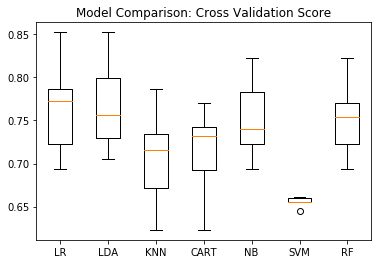

In [138]:
# Evaluate each model's accuracy on the validation set
print('Cross Validation Score: Mean accuracy & SD')
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %.2f%% (%.3f)' % (name, cv_results.mean()*100, cv_results.std()))
    
# Visualize model comparison
plt.boxplot(results, labels=names)
plt.title('Model Comparison: Cross Validation Score')
plt.show()

#### *EXTRA: optimize only one model*

KNN: 70.35% (0.047)


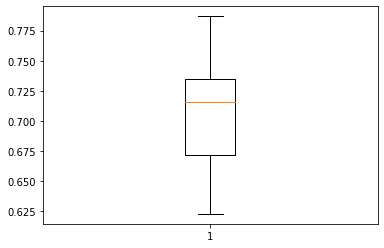

In [32]:
# Evaluate 1 model using Cross Validation
kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
KNNresults = cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=kfold, scoring='accuracy')
print('KNN: %.2f%% (%.3f)' % (KNNresults.mean()*100, KNNresults.std()))

# Visualize model
plt.boxplot(KNNresults)
plt.show()

### Evaluate Model Performance (1)

Performance metrics on ***train set***:

In [141]:
print('Train Set Performance Metrics: Accuracy & ROC')
for name, model in models:
    trained_model = model.fit(x_train, y_train)
    y_train_pred = trained_model.predict(x_train)
    print('%s: %.2f%% (%.3f)' % (name, accuracy_score(y_train, y_train_pred)*100, (roc_auc_score(y_train, y_train_pred))))

Train Set Performance Metrics: Accuracy & ROC
LR: 77.69% (0.719)
LDA: 78.18% (0.732)
KNN: 79.97% (0.769)
CART: 100.00% (1.000)
NB: 76.06% (0.723)
SVM: 100.00% (1.000)
RF: 100.00% (1.000)


Performance metrics on ***test set***:

In [142]:
print('Test Set Performance Metrics: Accuracy & ROC')
for name, model in models:
    trained_model = model.fit(x_train, y_train)
    y_test_pred = trained_model.predict(x_test)
    print('%s: %.2f%% (%.3f)' % (name, accuracy_score(y_test, y_test_pred)*100, (roc_auc_score(y_test, y_test_pred))))

Test Set Performance Metrics: Accuracy & ROC
LR: 79.22% (0.741)
LDA: 79.22% (0.748)
KNN: 70.78% (0.660)
CART: 75.97% (0.726)
NB: 75.32% (0.735)
SVM: 62.99% (0.500)
RF: 80.52% (0.777)


#### *EXTRA: deep error check on individual model*

In [149]:
# Train model
knn = KNeighborsClassifier().fit(x_train, y_train)


# Predict y on train set
y_train_pred = knn.predict(x_train)

# Train set performance metrics
print('Train Set Performance Metrics: Accuracy & ROC')
print('%.2f%% (%.3f)' % (accuracy_score(y_train, y_train_pred)*100, roc_auc_score(y_train, y_train_pred)))

# Predict y on test set
y_test_pred = knn.predict(x_test)

# Test set performance metrics
print('Train Set Performance Metrics: Accuracy & ROC')
print('%.2f%% (%.3f)' % (accuracy_score(y_test, y_test_pred)*100, roc_auc_score(y_test, y_test_pred)))

# Confusion matrix
print('Confusion Matrix: \n %s' % (confusion_matrix(y_test, y_test_pred)))

# Classification report
print(classification_report(y_test, y_test_pred))

Train Set Performance Metrics: Accuracy & ROC
79.97% (0.769)
Train Set Performance Metrics: Accuracy & ROC
70.78% (0.660)
Confusion Matrix: 
 [[82 15]
 [30 27]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        97
           1       0.64      0.47      0.55        57

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



## Iteration (2)

### Optimize Models by Tuning Hyperparameters (2)

For the purpose of understanding Hyperparameter Tuning, let's choose K-Nearest Neighbours (KNN).

In [155]:
# K-Nearest Neighbors (KNN)
#Create dictionary of hyperparameters that we want to tune
knn_params = {
    'n_neighbors':[1,3,5,7,9,11,15,17,19],
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan'],
    'leaf_size':list(range(1,50)),
    'p':[1,2,3]
}

# Create new KNN object using GridSearch
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10)

#Fit the model
best_model_knn = grid_knn.fit(x_train, y_train)

# Print the value of best hyperparameters
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['weights'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['metric'])
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])
#print(best_model_knn.best_params_)

Best n_neighbors: 19
Best n_neighbors: distance
Best n_neighbors: manhattan
Best leaf_size: 1
Best p: 1


#### *Additional Example for Tuning Hyperparameters*

In [38]:
# Ridge Regression (RR)
#List hyperparameters that we want to tune
alpha = np.array([1,0.1,0.01,0.001,0.0001,0])

#Convert to dictionary
hyperparameters_ridge = dict(alpha=alpha)

# Create new Ridge object using GridSearch
grid_ridge = GridSearchCV(Ridge(), hyperparameters_ridge, cv=kfold)

#Fit the model
best_model_ridge = grid_ridge.fit(x,y)

#Print the value of best hyperparameters
print('Best score:', best_model_ridge.best_score_)
print('Best alpha:', best_model_ridge.best_estimator_.get_params()['alpha'])

Best score: 0.2893075842840066
Best alpha: 1.0


### Evaluate Model Performance (2)

In [161]:
print(best_model_knn.best_params_)

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}


In [156]:
# Predict y on train set
y_train_pred_2 = best_model_knn.predict(x_train)

# Train set performance metrics
print('Train Set Performance Metrics: Accuracy & ROC')
print('%.2f%% (%.3f)' % (accuracy_score(y_train, y_train_pred_2)*100, roc_auc_score(y_train, y_train_pred_2)))

# Predict y on test set
y_test_pred_2 = best_model_knn.predict(x_test)

# Test set performance metrics
print('Train Set Performance Metrics: Accuracy & ROC')
print('%.2f%% (%.3f)' % (accuracy_score(y_test, y_test_pred_2)*100, roc_auc_score(y_test, y_test_pred_2)))


# Confusion matrix
print('Confusion Matrix: \n %s' % (confusion_matrix(y_test, y_test_pred_2)))

# Classification report
print(classification_report(y_test, y_test_pred_2))

Train Set Performance Metrics: Accuracy & ROC
100.00% (1.000)
Train Set Performance Metrics: Accuracy & ROC
76.62% (0.724)
Confusion Matrix: 
 [[86 11]
 [25 32]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        97
           1       0.74      0.56      0.64        57

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



# Save & Use Model

In [76]:
# Save model to disk
FinalModel_KNN = 'FinalModel.sav'
pickle.dump(best_model_knn, open(FinalModel_KNN, 'wb'))

In [80]:
# Load model from disk
Load_FinalModel = pickle.load(open(FinalModel_KNN, 'rb'))

In [85]:
# Apply model to new dataset to make predictions
result = Load_FinalModel.score(x_test, y_test)
print('Accuracy: %.3f%%' % (result*100))

Accuracy: 77.273%
